In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
from sklearn import metrics 
from sklearn.metrics import classification_report,confusion_matrix
#Ignore warnings 
warnings.filterwarnings("ignore")
# Seaborn visualization set up 
%matplotlib inline 
sns.set_style('darkgrid')

In [2]:
# Reading the dataset 
data=pd.read_csv("diabetes.csv") 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

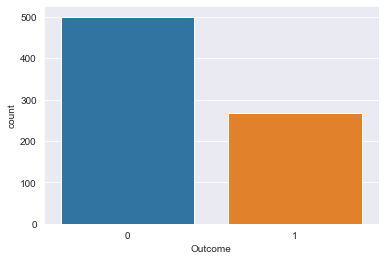

In [6]:
sns.countplot(x='Outcome',data=data)

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Spitting the dataset
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [9]:
#Train the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [10]:
# Check columns with zero values 
print("Total number of rows:{0}",format(len(data)))
print("Number of rows missing Pregnancies:{0}", format(len(data.loc[data['Pregnancies']==0]))) 
print("Number of rows missing Glucose:{0}", format(len(data.loc[data['Glucose']==0])))
print("Number of rows missing BloodPressure : {0}", format(len(data.loc[data['BloodPressure']==0])))
print("Number of rows missing SkinThickness : {0}", format(len(data.loc[data['SkinThickness']==0]))) 
print("Number of rows missing Insulin : {0}", format(len(data.loc[data['Insulin']==0]))) 
print("Number of rows missing BMI : {0}", format(len(data.loc[data['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction : {0}",format(len(data.loc[data['DiabetesPedigreeFunction']==0]))) 
print("Number of rows missing Age : {0}", format(len(data.loc[data['Age']])))

Total number of rows:{0} 768
Number of rows missing Pregnancies:{0} 111
Number of rows missing Glucose:{0} 5
Number of rows missing BloodPressure : {0} 35
Number of rows missing SkinThickness : {0} 227
Number of rows missing Insulin : {0} 374
Number of rows missing BMI : {0} 11
Number of rows missing DiabetesPedigreeFunction : {0} 0
Number of rows missing Age : {0} 768


In [11]:
# Imputing zeros values in the dataset 
from sklearn.impute import SimpleImputer 
fill_values=SimpleImputer(missing_values=0,strategy='mean') 
x_train=fill_values.fit_transform(x_train) 
x_test=fill_values.fit_transform(x_test)

In [12]:
#Building the model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
#Predict the labels of the data values on the basis of trained model
predictions=dtree.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [14]:
#Getting the accuracy score for the DecisionTree
print("Accuracy score = ",format(metrics.accuracy_score(y_test,predictions)))

Accuracy score =  0.7445887445887446


In [15]:
#Getting the confusion matrix and classification report
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[123  27]
 [ 32  49]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       150
           1       0.64      0.60      0.62        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



In [16]:
#Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [17]:
#Predict the labels of the data values on the basis of the trained model
predictions=rfc.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [18]:
#Getting the accuracy score for RandomForest 
print("Accuracy Score = ",format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score =  0.7748917748917749


In [19]:
#Getting the confusion matrix and classification report
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[125  25]
 [ 27  54]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       150
           1       0.68      0.67      0.68        81

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



In [20]:
#Getting feature importances
rfc.feature_importances_

array([0.0736704 , 0.25754566, 0.08067697, 0.07740157, 0.09149771,
       0.15788287, 0.12503758, 0.13628724])

In [21]:
#Display feature_names and their respective Importance
df=pd.DataFrame({"Feature_name ":x.columns,"Importances":rfc.feature_importances_})
df

,Feature_name,Importances
0,Pregnancies,0.073670
1,Glucose,0.257546
2,BloodPressure,0.080677
3,SkinThickness,0.077402
4,Insulin,0.091498
5,BMI,0.157883
6,DiabetesPedigreeFunction,0.125038
7,Age,0.136287


In [22]:
df.sort_values(by =['Importances'],inplace = True,ascending = False)
df

,Feature_name,Importances
1,Glucose,0.257546
5,BMI,0.157883
7,Age,0.136287
6,DiabetesPedigreeFunction,0.125038
4,Insulin,0.091498
2,BloodPressure,0.080677
3,SkinThickness,0.077402
0,Pregnancies,0.073670


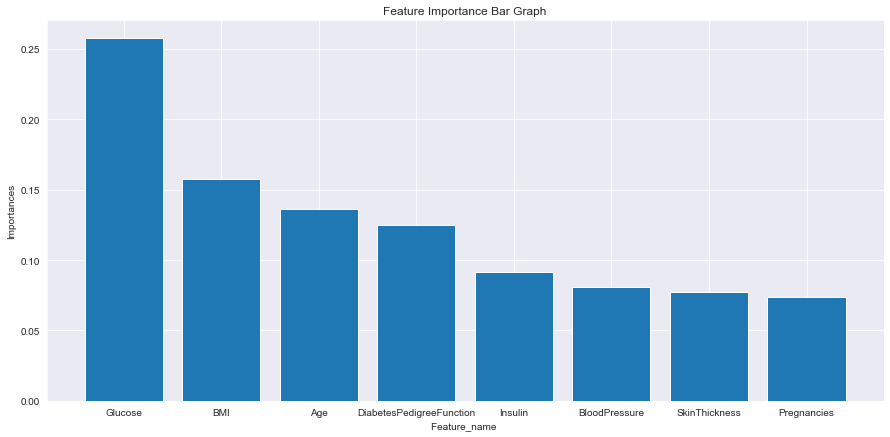

In [29]:
plt.figure(figsize=(15,7))
plt.bar(df['Feature_name '],df['Importances'])
plt.xlabel('Feature_name ')
plt.ylabel('Importances')
plt.title('Feature Importance Bar Graph')
plt.show()

In [31]:
print('prediction Probabilities')
rfc.predict_proba(x_test)

prediction Probabilities


array([[0.44 , 0.56 ],
       [0.15 , 0.85 ],
       [0.845, 0.155],
       [0.595, 0.405],
       [0.945, 0.055],
       [0.365, 0.635],
       [0.145, 0.855],
       [0.855, 0.145],
       [0.49 , 0.51 ],
       [0.78 , 0.22 ],
       [0.98 , 0.02 ],
       [0.805, 0.195],
       [0.65 , 0.35 ],
       [0.565, 0.435],
       [0.725, 0.275],
       [0.29 , 0.71 ],
       [0.17 , 0.83 ],
       [0.97 , 0.03 ],
       [0.465, 0.535],
       [1.   , 0.   ],
       [0.73 , 0.27 ],
       [0.69 , 0.31 ],
       [0.415, 0.585],
       [0.725, 0.275],
       [0.92 , 0.08 ],
       [0.175, 0.825],
       [0.95 , 0.05 ],
       [0.575, 0.425],
       [0.97 , 0.03 ],
       [0.44 , 0.56 ],
       [0.21 , 0.79 ],
       [0.53 , 0.47 ],
       [0.535, 0.465],
       [0.48 , 0.52 ],
       [0.9  , 0.1  ],
       [0.855, 0.145],
       [0.56 , 0.44 ],
       [0.25 , 0.75 ],
       [0.18 , 0.82 ],
       [0.91 , 0.09 ],
       [0.925, 0.075],
       [0.41 , 0.59 ],
       [0.86 , 0.14 ],
       [0.4